In [13]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from math import *
from scipy import interpolate
%matplotlib inline

In [14]:

#Cделам частоту дискретизации  для удобства по умолчанию 128, потому что так  гораздо легче обрабатывать.
def FunctionDraw(f, title=" ",T=10,N=128):
    x = []
    y = []
    for i in range(1,N):
        x.append(T/N*i)
        y.append(f(T/N*i))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    a1=plt.plot(x, y,'.b-')
    plt.show()

In [15]:
def FFT (a):
    n = len(a)
    a_0=[]
    a_1=[]
    if (n == 1):
        return [a[0]]
    for i in range(len(a)):
        if i%2==0:
            a_0.append(a[i])
        else:
            a_1.append(a[i])
    a0 = FFT (a_0)
    a1 = FFT (a_1)
 
    ang = 2 * pi / n
    
    
    ans = [complex(0, 0)] * len(a)
    w_exp = lambda x : np.exp(2*complex(0,1) * pi * x/ n)
    for j in range(n // 2):
        ans[j] = a0[j] + w_exp(j) * a1[j]
        ans[j + n // 2] = a0[j] - w_exp(j) * a1[j]

    
    return ans

In [16]:
def FFTReverse (a):
    n = len(a)
    a_0=[]
    a_1=[]
    if (n == 1):
        return [a[0]]
    for i in range(len(a)):
        if i%2==0:
            a_0.append(a[i])
        else:
            a_1.append(a[i])
    a0 = FFTReverse (a_0)
    a1 = FFTReverse (a_1)
    ans = [complex(0, 0)] * len(a) 
    w_exp = lambda x : np.exp(-2*complex(0,1) * pi * x/ n)
    for j in range(n // 2):
        ans[j] = a0[j] + w_exp(j) * a1[j];
        ans[j + n // 2] = a0[j] - w_exp(j) * a1[j];
        ans[j] = ans[j] / 2
        ans[j + n // 2] = ans[j + n // 2] / 2;
    return ans

In [17]:
def GetRealPart(ans):
    a=[]
    for i in range(len(ans)):
        a.append(ans[i].real)
    return a

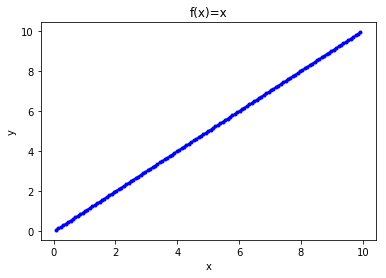

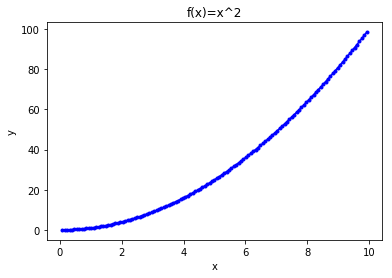

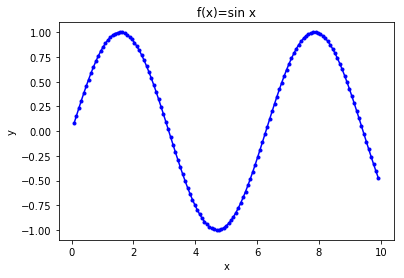

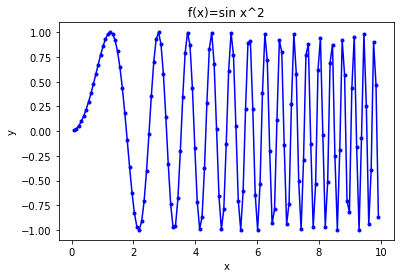

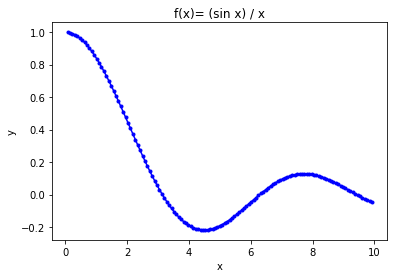

In [18]:
FunctionDraw(lambda x: x, "f(x)=x")
FunctionDraw(lambda x: x**2, "f(x)=x^2")
FunctionDraw(lambda x: sin(x), "f(x)=sin x")
FunctionDraw(lambda x: sin(x**2), "f(x)=sin x^2")
FunctionDraw(lambda x: sin(x) / (x + 1e-10), "f(x)= (sin x) / x") #to not cause division by zero


In [19]:
def FunctionFFT(f, title=" ",T=10,N=128,D=0): 
    #вызывая эту функцию с разными D можно экспериментально выяснить какой D подходит
    j=log(N,2)
    N=2**(int(j)+1)
    x = []
    y = []
    for i in range(N):
        x.append((T/N)*i)
        y.append(f((T/N)*i))
    g = FFT(y)
    for i in range(1,int(D*N)):
        g[len(g)-i]=0
    y1=FFTReverse(g)
    y1=GetRealPart(y1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.plot(x, y1,'.b-')
    
    plt.show()

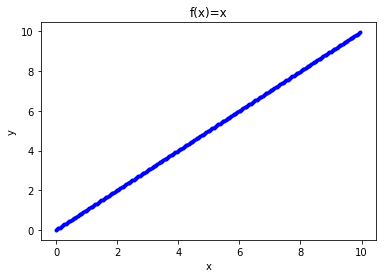

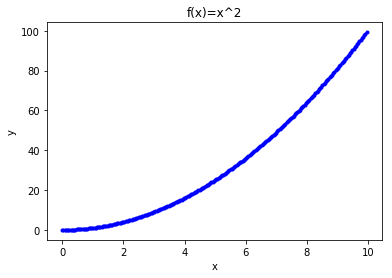

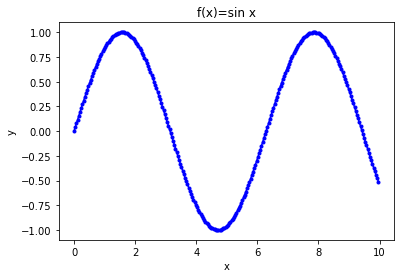

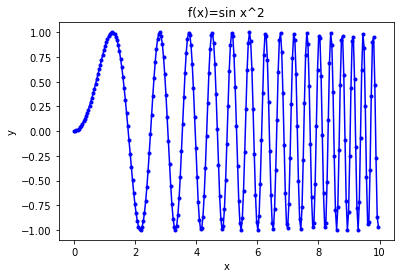

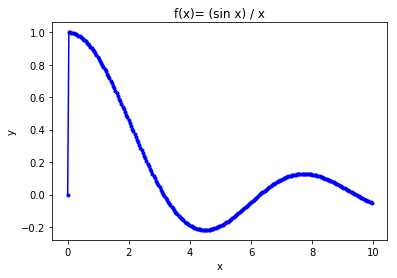

In [20]:
FunctionFFT(lambda x: x, "f(x)=x")
FunctionFFT(lambda x: x**2, "f(x)=x^2")
FunctionFFT(lambda x: sin(x), "f(x)=sin x")
FunctionFFT(lambda x: sin(x**2), "f(x)=sin x^2")
FunctionFFT(lambda x: sin(x) / (x + 1e-10), "f(x)= (sin x) / x")


## Как видно FFT и обратное FFT работают корректно

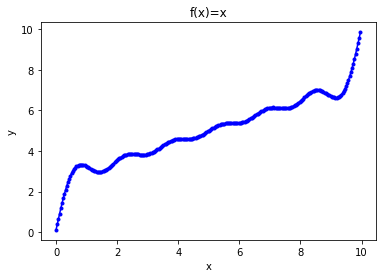

In [21]:
FunctionFFT(lambda x: x, "f(x)=x",T=10,N=128,D=0.03)#как видим если занулить хотя бы один коэффицент в FFT(g),то получится

### как видим если занулить хотя бы один коэффицент в y=FFT(f(x)=x), и выполнить FFTReverse(y) ,  то получается какой-то бред,так как алгоритм рекурсивный и каждое слагаемое сильно влияет на его результат

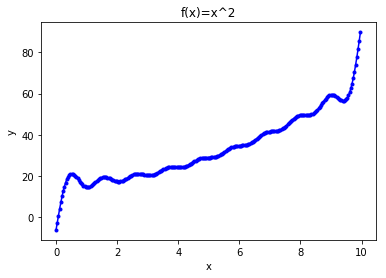

In [22]:
FunctionFFT(lambda x: x**2, "f(x)=x^2",T=10,N=128,D=0.04)

### как видим для не гармонических функций замена даже одного слагаемого критична

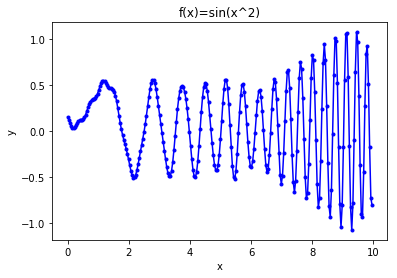

In [23]:
FunctionFFT(lambda x: sin(x**2), "f(x)=sin(x^2)",T=10,N=128,D=0.1)

#### Для  гармонических же даже замена 1/10 слагаемых видна не так отчетливо

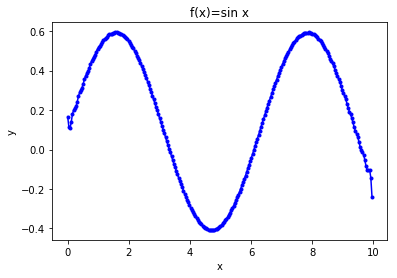

In [24]:
FunctionFFT(lambda x: sin(x), "f(x)=sin x",D=0.2)

### в случае sin(x) зарезание  слагаемых ведет к уменьшению амлитуды но вид функции отстается тот же

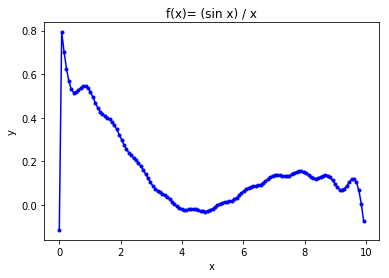

In [663]:
FunctionFFT(lambda x: sin(x) / (x + 1e-10), "f(x)= (sin x) / x",D=0.1)

### как видно вблизи 0 когда x эквивалентен синусу различий почти нет,далее онм существенны